In [40]:
#importer les librairies pours utiliser un CNN
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Input
import keras.layers as layers
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import LeakyReLU
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

In [2]:
#importer les données de training et test
trainData = pd.read_csv('Data/train.csv')
trainLabels = pd.read_csv('Data/train_result.csv')
testData = pd.read_csv('Data/test.csv')

In [3]:
#Mettre les points en bas de 0 à 0 et enlver les NaN
trainData[trainData < 0] = 0
trainData = trainData.dropna(axis=1)

testData[testData < 0] = 0
testData = testData[trainData.columns]

In [4]:
#Reformer les donnees pour avoir une matrice de 4d pour que l'entree dans le CNN soit en 3d
newTrainData = np.array(trainData).reshape(50000,28,56,1)

In [5]:
#Créer les données de training et validation
trainX,validX,trainY,validY = train_test_split(newTrainData,trainLabels,test_size = 0.2, random_state = 1)

10

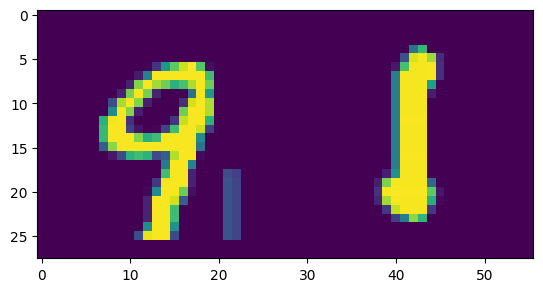

In [7]:
#Visualiser
import matplotlib.pyplot as plt
plt.imshow(trainX[15])
trainY.iloc[15,1]

In [8]:
#Transformer les labels en one hot vector
labels = trainLabels.iloc[:,1].unique().size
trainYOH = keras.utils.to_categorical(trainY['Class'], labels)
validYOH = keras.utils.to_categorical(validY['Class'], labels)

In [25]:
#Batir le CNN
model = keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,56,1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=19, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [44]:
#Hyperparametre d'entrainement
batchSize = 128
epochs = 50

In [27]:
#Entrainer le model et voir sa precision sur le validation set
model.fit(trainX, trainYOH,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(validX, validYOH))
#score = model.evaluate(validX, validYOH, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Epoch 1/100
313/313 [==============================] - 8s 26ms/step - loss: 2.2591 - accuracy: 0.2439 - val_loss: 1.5565 - val_accuracy: 0.4918
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 1.1028 - accuracy: 0.6504 - val_loss: 0.7816 - val_accuracy: 0.7595
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6307 - accuracy: 0.8056 - val_loss: 0.5593 - val_accuracy: 0.8299
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 0.4491 - accuracy: 0.8648 - val_loss: 0.4442 - val_accuracy: 0.8610
Epoch 5/100
313/313 [==============================] - 9s 29ms/step - loss: 0.3544 - accuracy: 0.8927 - val_loss: 0.4013 - val_accuracy: 0.8762
Epoch 6/100
313/313 [==============================] - 9s 29ms/step - loss: 0.3002 - accuracy: 0.9092 - val_loss: 0.3650 - val_accuracy: 0.8887
Epoch 7/100
313/313 [==============================] - 9s 30ms/step - loss: 0.2596 - accuracy: 0.9197 - val_loss: 0.3413 - val_accuracy:

In [31]:
model.evaluate(validX, validYOH, verbose=0)

[0.5221875309944153, 0.945900022983551]

In [34]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,56,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(19, activation = "softmax"))

In [38]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [43]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [46]:
#Entrainer le model et voir sa precision sur le validation set
model.fit(trainX, trainYOH,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(validX, validYOH),
             callbacks=[learning_rate_reduction])
#score = model.evaluate(validX, validYOH, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Epoch 1/50
313/313 [==============================] - 140s 446ms/step - loss: 0.0419 - accuracy: 0.9888 - val_loss: 0.0281 - val_accuracy: 0.9945 - lr: 6.2500e-05
Epoch 2/50
313/313 [==============================] - 161s 515ms/step - loss: 0.0409 - accuracy: 0.9893 - val_loss: 0.0248 - val_accuracy: 0.9948 - lr: 6.2500e-05
Epoch 3/50
313/313 [==============================] - 184s 588ms/step - loss: 0.0408 - accuracy: 0.9888 - val_loss: 0.0257 - val_accuracy: 0.9947 - lr: 6.2500e-05
Epoch 4/50
313/313 [==============================] - 215s 687ms/step - loss: 0.0394 - accuracy: 0.9905 - val_loss: 0.0273 - val_accuracy: 0.9952 - lr: 6.2500e-05
Epoch 5/50
313/313 [==============================] - 227s 727ms/step - loss: 0.0432 - accuracy: 0.9891 - val_loss: 0.0272 - val_accuracy: 0.9946 - lr: 6.2500e-05
Epoch 6/50
313/313 [==============================] - 220s 704ms/step - loss: 0.0420 - accuracy: 0.9895 - val_loss: 0.0263 - val_accuracy: 0.9950 - lr: 6.2500e-05
Epoch 7/50
313/313 [==

In [49]:
#Predire les donnees de test
newTestData = np.array(testData).reshape(10000,28,56,1)
predictions = model.predict(newTestData)

313/313 [==============================] - 7s 21ms/step


In [50]:
#Prendre le argmax de chaque rangee
predictionsVal = np.argmax(predictions,axis=1)

In [52]:
#Transformer et exporter les prédictions
predict = pd.DataFrame([range(10000),predictionsVal], index = ['Index','Class']).transpose()

predict.to_csv('predictions_CNN.csv',index=False)